In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, TimeSeriesSplit
from sklearn.pipeline import make_pipeline
import sklearn

In [38]:
df1 = pd.read_csv('cpdata1.csv')
df2 = pd.read_csv('cpdata2.csv')
df3 = pd.read_csv('cpdata3.csv')

df1 = df1.rename(columns = {"Unnamed: 0":"Time", "标快":"bk", "顺丰":"sf"})
df2 = df2.rename(columns = {"Unnamed: 0":"Time", "快包":"kb", "中通":"zt"})
df3 = df3.rename(columns = {"Unnamed: 0":"Time", "业务量":"amount"})

df3 = df3.dropna()
df3.tail()

,Time,amount
27,202004,67195.0
28,202005,69330.6
29,202006,68657.6
30,202007,62151.7
31,202008,62677.1


In [39]:
df3.to_csv('dt.csv', index = False)

In [40]:
df3['Time'] = np.linspace(0,31,32)
# df_train, df_test = train_test_split(df3, train_size = , test_size = )
df_train = df3
df_train = df_train.sort_values(by = 'Time')

In [41]:
x_train = df_train['Time'].values
# x_test = df_test['Time'].values
y_train = df_train['amount'].values
# y_test = df_test['amount'].values

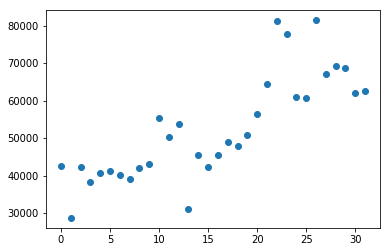

In [42]:
plt.scatter(x_train, y_train)
# plt.scatter(x_test, y_test, color= 'r')
plt.show()

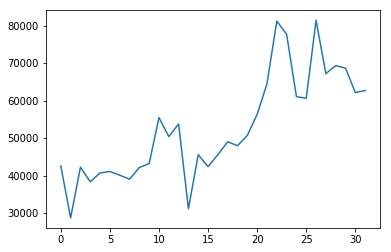

In [43]:
plt.plot(df3['Time'], df3['amount'])
plt.show()

In [44]:
x_train.reshape(32,1)
y_train.reshape(32,1)

array([[42600.2],
       [28719.8],
       [42261. ],
       [38358.4],
       [40719.5],
       [41107.4],
       [40127.2],
       [39041.2],
       [42155.9],
       [43229.2],
       [55466.4],
       [50407.4],
       [53765.1],
       [31168.4],
       [45579.8],
       [42384.9],
       [45596.9],
       [49022.1],
       [47980.8],
       [50711.4],
       [56335.3],
       [64462.4],
       [81198.2],
       [77679.4],
       [61050.4],
       [60632.6],
       [81431.3],
       [67195. ],
       [69330.6],
       [68657.6],
       [62151.7],
       [62677.1]])

In [45]:
x_train = x_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]
# x_test = x_test[:, np.newaxis]
# y_test = y_test[:, np.newaxis]

In [175]:
# The above is the proper data

linear_model = LinearRegression()
lasso_model = Lasso(alpha = 0.1, tol = 0.01, warm_start = True)
ridge_model = Ridge(alpha = 1, tol = 0.001)

In [176]:
poly_reg = PolynomialFeatures(degree = 9)
x_pol = poly_reg.fit_transform(x_train)

In [177]:
linear_predictor = linear_model.fit(x_pol, y_train)
lasso_predictor = lasso_model.fit(x_pol, y_train)
ridge_predictor = ridge_model.fit(x_pol, y_train)

/Users/stevenchan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/stevenchan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.38679e-28): result may not be accurate.
  overwrite_a=True).T


In [178]:
Lasso()

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

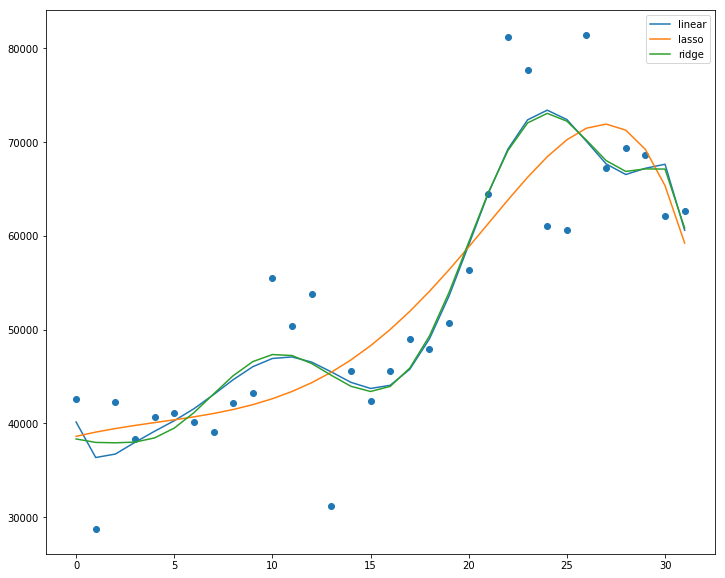

In [179]:
plt.figure(figsize = (12, 10))
plt.scatter(x_train, y_train)
plt.plot(x_train, linear_predictor.predict(x_pol), label = "linear")
plt.plot(x_train, lasso_predictor.predict(x_pol), label = "lasso")
plt.plot(x_train, ridge_predictor.predict(x_pol), label = "ridge")
plt.legend()
plt.show()

In [137]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=folds)
scores 

array([-1.18195069e+08, -4.13290715e+07, -4.07754426e+07, -1.22255564e+08,
       -6.43549834e+07])